In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler



In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
def print_error_matrix(y_test,y_pred):
    confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_mtx,
                annot=True, fmt='g',
                cmap='coolwarm')
    plt.xlabel('Prediction')
    plt.ylabel('True')
    plt.show()

In [4]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [5]:
train=pd.read_csv("dataset_train.csv")
test=pd.read_csv("dataset_test.csv")

scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train), columns=train.columns)

test = pd.DataFrame(scaler.transform(test), columns=test.columns)



X_train = train.iloc[: ,1:].values
y_train = train['arrytmia'].values

X_test = test.iloc[: ,1:].values
y_test = test['arrytmia'].values

In [6]:
_, X_val, _, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## KNN

              precision    recall  f1-score   support

         0.0       0.96      0.23      0.37      1856
         1.0       0.61      0.99      0.76      2257

    accuracy                           0.65      4113
   macro avg       0.78      0.61      0.56      4113
weighted avg       0.77      0.65      0.58      4113



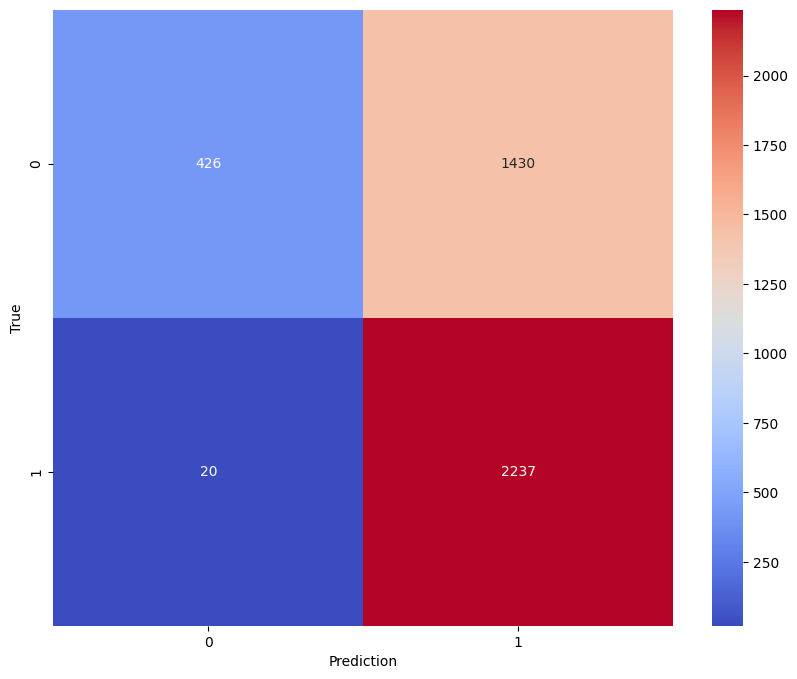

In [7]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

In [8]:
# k_values = range(50, 2100,100)  
# val_accuracies = []

# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train, y_train) 
#     y_val_pred = knn.predict(X_test) 
#     acc = accuracy_score(y_test, y_val_pred) 
#     val_accuracies.append(acc)

# best_k = k_values[np.argmax(val_accuracies)]
# print(f'Najlepsza wartość K: {best_k} z dokładnością: {max(val_accuracies):.2f}')

## DecisionTree

              precision    recall  f1-score   support

         0.0       0.96      0.23      0.37      1856
         1.0       0.61      0.99      0.76      2257

    accuracy                           0.65      4113
   macro avg       0.78      0.61      0.56      4113
weighted avg       0.77      0.65      0.58      4113



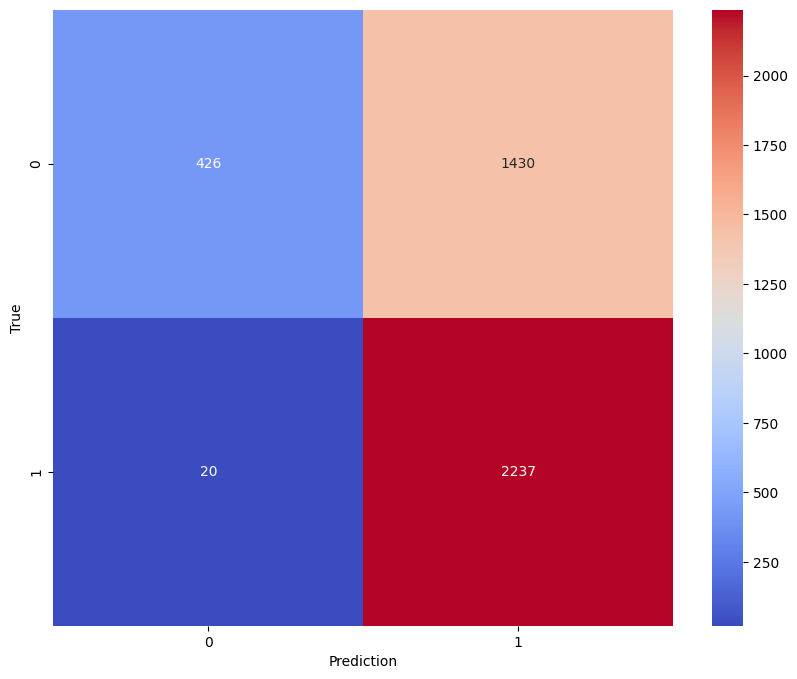

In [9]:
clf = DecisionTreeClassifier(max_depth=30)  
clf.fit(X_train, y_train)


accuracy = clf.score(X_test, y_test) 
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

## RandomForest

              precision    recall  f1-score   support

         0.0       0.92      0.10      0.18      1856
         1.0       0.57      0.99      0.73      2257

    accuracy                           0.59      4113
   macro avg       0.74      0.55      0.45      4113
weighted avg       0.73      0.59      0.48      4113



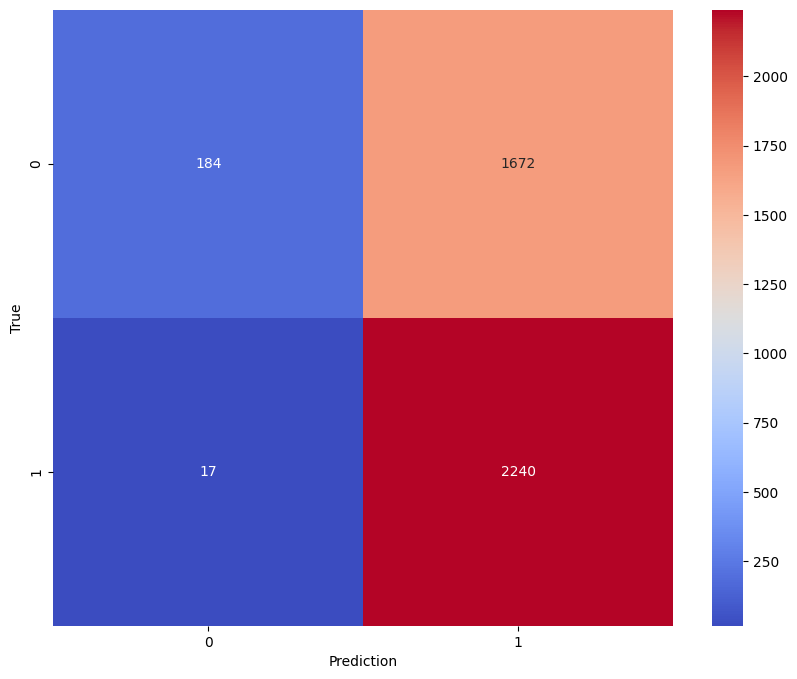

In [10]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

## SVM

              precision    recall  f1-score   support

         0.0       0.96      0.20      0.33      1856
         1.0       0.60      0.99      0.75      2257

    accuracy                           0.63      4113
   macro avg       0.78      0.59      0.54      4113
weighted avg       0.76      0.63      0.56      4113



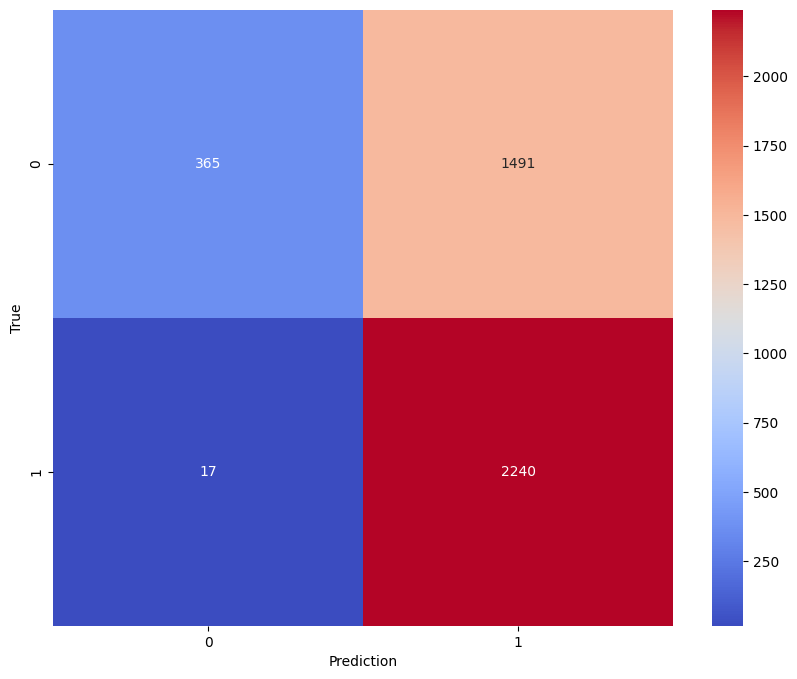

In [11]:
clf = SVC(kernel='linear')  # 'rbf', 'poly', 'sigmoid'
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

## klasyfikator Naive Bayes

              precision    recall  f1-score   support

         0.0       0.89      0.11      0.20      1856
         1.0       0.58      0.99      0.73      2257

    accuracy                           0.59      4113
   macro avg       0.73      0.55      0.46      4113
weighted avg       0.72      0.59      0.49      4113



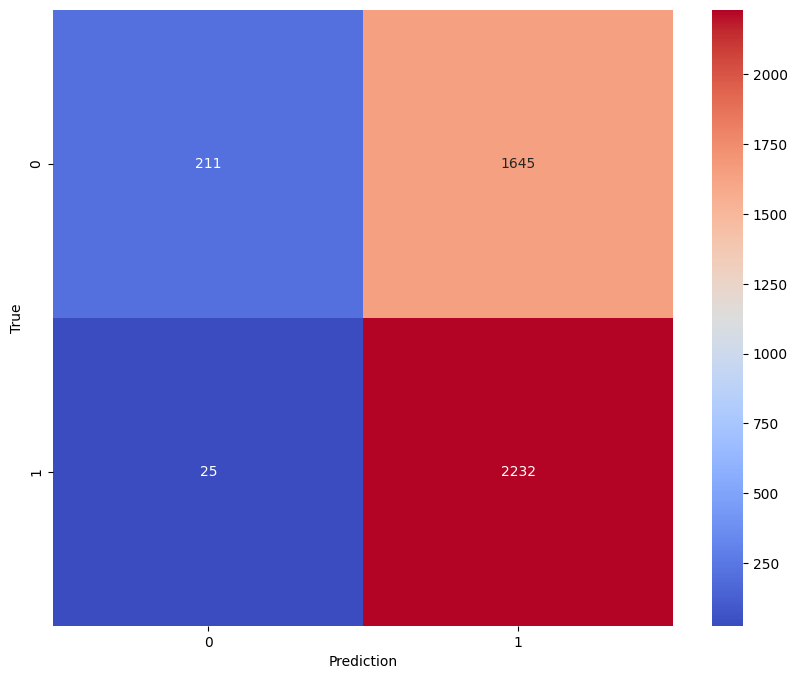

In [12]:
model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
print_error_matrix(y_test,y_pred)

## Neural Network

In [17]:
def custom_scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return float(lr * tf.math.exp(-0.1))

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(256, activation='relu'), 
    layers.Dense(128, activation='relu'), 
    layers.Dense(1, activation='sigmoid') 
])

scheduler = LearningRateScheduler(custom_scheduler)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test),callbacks=[scheduler])

Epoch 1/20
474/474 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9010 - loss: 0.2529 - val_accuracy: 0.6049 - val_loss: 1.5683 - learning_rate: 0.0010
Epoch 2/20
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.9617 - loss: 0.1094 - val_accuracy: 0.6856 - val_loss: 1.1958 - learning_rate: 0.0010
Epoch 3/20
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9686 - loss: 0.0875 - val_accuracy: 0.6779 - val_loss: 1.2346 - learning_rate: 0.0010
Epoch 4/20
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.9697 - loss: 0.0832 - val_accuracy: 0.6980 - val_loss: 1.0757 - learning_rate: 0.0010
Epoch 5/20
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - accuracy: 0.9726 - loss: 0.0739 - val_accuracy: 0.7433 - val_loss: 0.8516 - learning_rate: 0.0010
Epoch 6/20
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9752 - loss: 0.0679 - val_accuracy: 0.7328 - val_loss: 0.8824 - learning_rate: 9.0484e-04
Epoch 7/20
474/474 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.9774 -

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
              precision    recall  f1-score   support

         0.0       0.92      0.51      0.66      1856
         1.0       0.70      0.96      0.81      2257

    accuracy                           0.76      4113
   macro avg       0.81      0.74      0.73      4113
weighted avg       0.80      0.76      0.74      4113



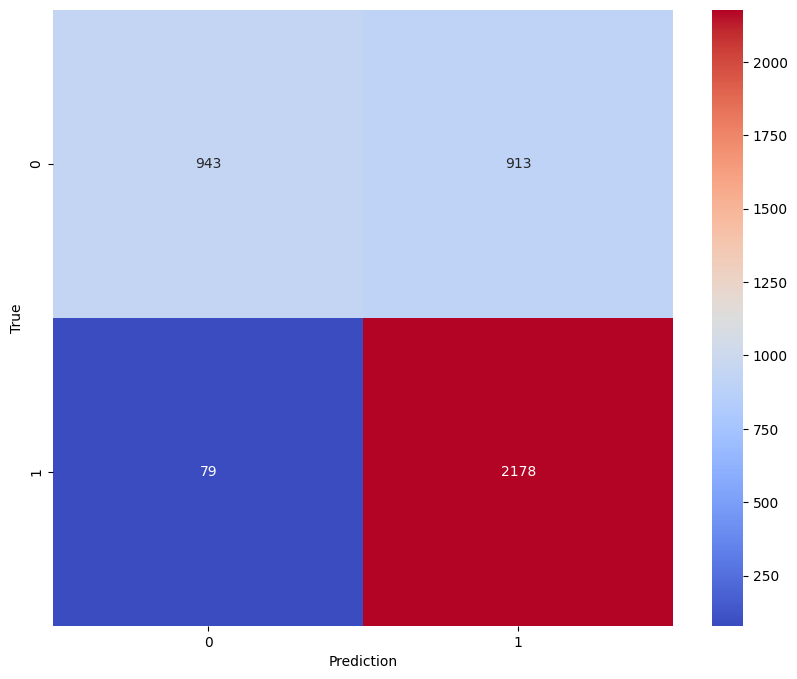

In [18]:
THRESHOLD=0.5

y_pred = model.predict(X_test)
y_pred = (y_pred > THRESHOLD).astype('int32')
print(classification_report(y_test, y_pred))

confusion_mtx = tf.math.confusion_matrix(y_test, y_pred)
print_error_matrix(y_test,y_pred)